<a href="https://colab.research.google.com/github/GergelyTuri/fiberphotometry/blob/annas/rnascope.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b annas https://github.com/GergelyTuri/fiberphotometry.git

Cloning into 'fiberphotometry'...
remote: Enumerating objects: 375, done.
remote: Counting objects: 100% (130/130), done.
remote: Compressing objects: 100% (102/102), done.
remote: Total 375 (delta 64), reused 72 (delta 21), pack-reused 245
Receiving objects: 100% (375/375), 27.49 MiB | 16.59 MiB/s, done.
Resolving deltas: 100% (187/187), done.


In [2]:
%cd fiberphotometry

/content/fiberphotometry


In [3]:
!pip install .

Processing /content/fiberphotometry
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 kB 2.2 MB/s eta 0:00:00
  Created wheel for fiber-photometry-analysis: filename=fiber_photometry_analysis-0.1-py3-none-any.whl size=9360 sha256=cea8ef84b75c4636459246e571d8842d4fea6e980cf26a2be85ee67063867d07
  Stored in directory: /tmp/pip-ephem-wheel-cache-lkwz80ao/wheels/4b/b6/cf/916d1f43d06b8bc573d2ec7471e525018bf5ea7bcf83b8e670
Successfully built fiber-photometry-analysis


In [7]:
!git pull

remote: Enumerating objects: 12, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 8 (delta 5), reused 7 (delta 4), pack-reused 0
Unpacking objects: 100% (8/8), 788 bytes | 262.00 KiB/s, done.
From https://github.com/GergelyTuri/fiberphotometry
   d779711..ef270df  annas      -> origin/annas
Updating d779711..ef270df
Fast-forward
 Anna/rnascope_analysis.py | 3 +++
 Anna/rnascope_plotting.py | 3 ++-
 2 files changed, 5 insertions(+), 1 deletion(-)


In [10]:
import pandas as pd
from datetime import datetime, timedelta
from scipy.stats import ttest_ind
from Anna.rnascope_analysis import load_data, filter_data, aggregate_data, perform_ttest
from Anna.rnascope_plotting import plot_data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loaded data:
   slide_id  image_id       area     mean    b_area  b_mean  mean/area  \
0  070624_6  s1_ca3_a   83607.25   82.154  18406.20  66.923   0.000983   
1  070624_6   s1_dg_a  138970.60   87.863  38281.66  69.987   0.000632   
2  070624_6   s1_dg_b  163079.30  116.661  35202.60  80.338   0.000715   
3  070624_6  s1_ca3_b  143139.90  110.730  46117.71  89.799   0.000774   
4  070624_6  s2_ca3_a  139200.60  100.275  49997.41  62.604   0.000720   

   b_mean/b_area  value_sub_back  back_minus_value drug  
0       0.003636       -0.002653          0.002653    c  
1       0.001828       -0.001196          0.001196    c  
2       0.002282       -0.001567          0.001567    c  
3       0.001947       -0.001174          0.001174    c  
4       0.001252       -0.000532          0.000532   p7  

Filtered CA3 data:
   slide_id  image_id       area     mean    b_area  b_mean  mean/area  \
0  070624_6  s1_ca3_a   83607.25   82.154  18406.20  66.923   0.000983   
3  070624_6  s1_ca3_b  143

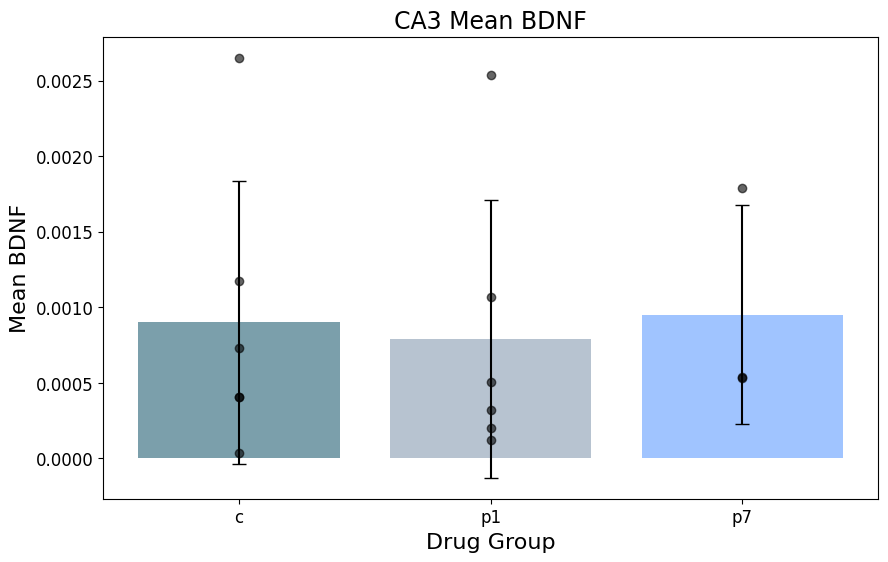

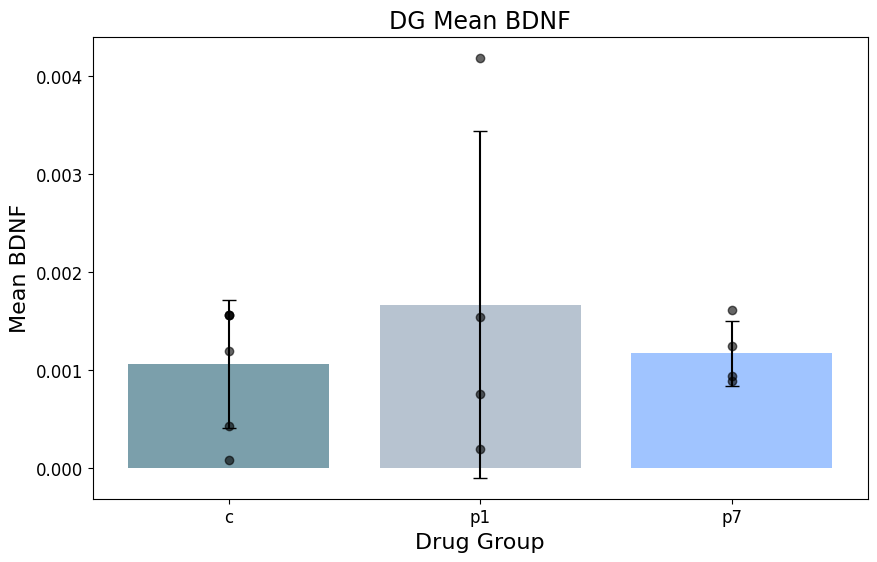


CA3 Control vs PCB T-test:
TtestResult(statistic=0.1194704617208447, pvalue=0.9067291636509985, df=13.0)

DG Control vs PCB T-test:
TtestResult(statistic=-0.647776505610193, pvalue=0.529328528990554, df=12.0)


In [11]:

def main(file_path: str):
    """
    Main function to load, process, and plot behavior data.

    Parameters:
    ----------
    file_path : str
        Path to the CSV file.
    """
    df = load_data(file_path)
    df_ca3, df_dg = filter_data(df)

    ca3_stats = aggregate_data(df_ca3, 'drug', 'back_minus_value')
    dg_stats = aggregate_data(df_dg, 'drug', 'back_minus_value')
    print("\nCA3 stats:")
    print(ca3_stats)
    print("\nDG stats:")
    print(dg_stats)

    colors = ['#7B9FAB', '#B7C3D0', '#A0C4FF']  # Muted blue tones

    plot_data(ca3_stats, df_ca3, 'CA3', colors)
    plot_data(dg_stats, df_dg, 'DG', colors)

    ca3_control = df_ca3[df_ca3['drug'] == 'c']['back_minus_value']
    ca3_pcb = df_ca3[df_ca3['drug'].isin(['p1', 'p7'])]['back_minus_value']
    dg_control = df_dg[df_dg['drug'] == 'c']['back_minus_value']
    dg_pcb = df_dg[df_dg['drug'].isin(['p1', 'p7'])]['back_minus_value']

    ca3_ttest = perform_ttest(ca3_control, ca3_pcb, "CA3")
    dg_ttest = perform_ttest(dg_control, dg_pcb, "DG")

if __name__ == "__main__":
    file_path = '/content/drive/MyDrive/rnascope - Sheet1 (3).csv'  # Update with the correct path if needed
    main(file_path)